# 데이터 로드

In [1]:
%config Completer.use_jedi = False
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta
import warnings
warnings.filterwarnings('ignore')
import random

%matplotlib inline

In [2]:
df = pd.read_excel("Churn.xlsx")
print(df.shape)
df.head()

(7043, 13)


,Age,Age Group,Number of Dependents,Membership,Satisfaction Score,Tech services,Streaming services,Combined Product,Contract,Tenure in Months,Monthly Charge,Total Revenue,Churn Value
0,78,70,0,None,3,1,1,2,Month-to-Month,1,39.65,59.65,1
1,74,70,1,Offer E,3,1,0,4,Month-to-Month,8,80.65,1024.10,1
2,71,70,3,Offer D,2,0,2,4,Month-to-Month,18,95.45,1910.88,1
3,78,70,1,Offer C,2,2,2,4,Month-to-Month,25,98.50,2995.07,1
4,80,80,1,Offer C,2,0,0,4,Month-to-Month,37,76.50,3102.36,1


# EDA

## 시각화

### 범주형

<AxesSubplot:xlabel='Contract', ylabel='Churn Value'>

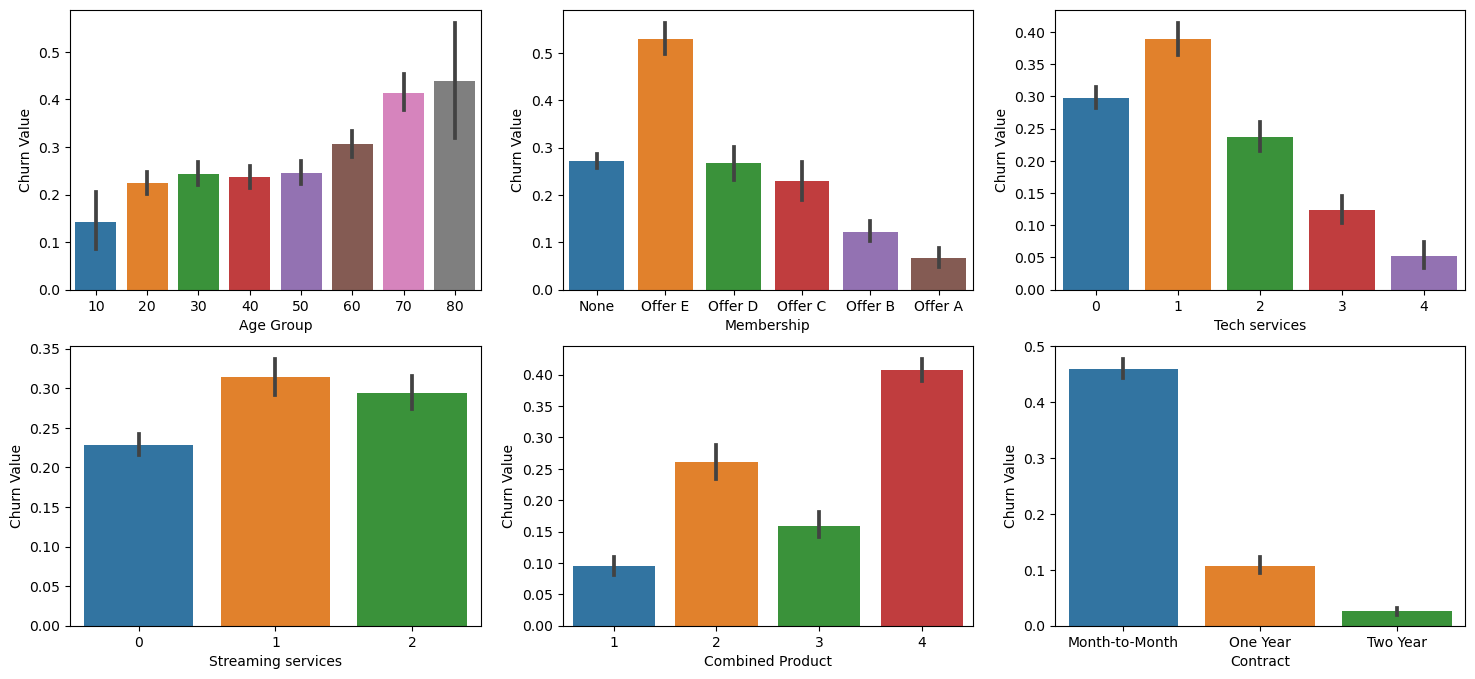

In [3]:
figure, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(18, 8)

sns.barplot(data=df, x="Age Group", y="Churn Value", ax=ax1)
sns.barplot(data=df, x="Membership", y="Churn Value", ax=ax2)
sns.barplot(data=df, x="Tech services", y="Churn Value", ax=ax3)
sns.barplot(data=df, x="Streaming services", y="Churn Value", ax=ax4)
sns.barplot(data=df, x="Combined Product", y="Churn Value", ax=ax5)
sns.barplot(data=df, x="Contract", y="Churn Value", ax=ax6)

<AxesSubplot:xlabel='Satisfaction Score', ylabel='Churn Value'>

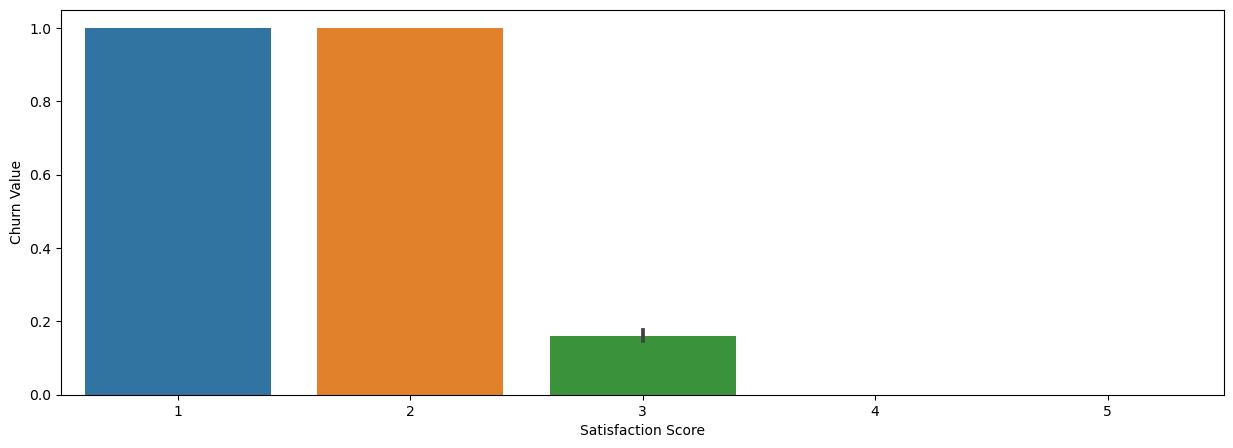

In [4]:
# Satisfaction Score
fig,(ax1)= plt.subplots(nrows=1)
fig.set_size_inches(15,5)
sns.barplot(data=df, x="Satisfaction Score", y="Churn Value", ax=ax1)

### 수치형

<AxesSubplot:xlabel='Age', ylabel='Churn Value'>

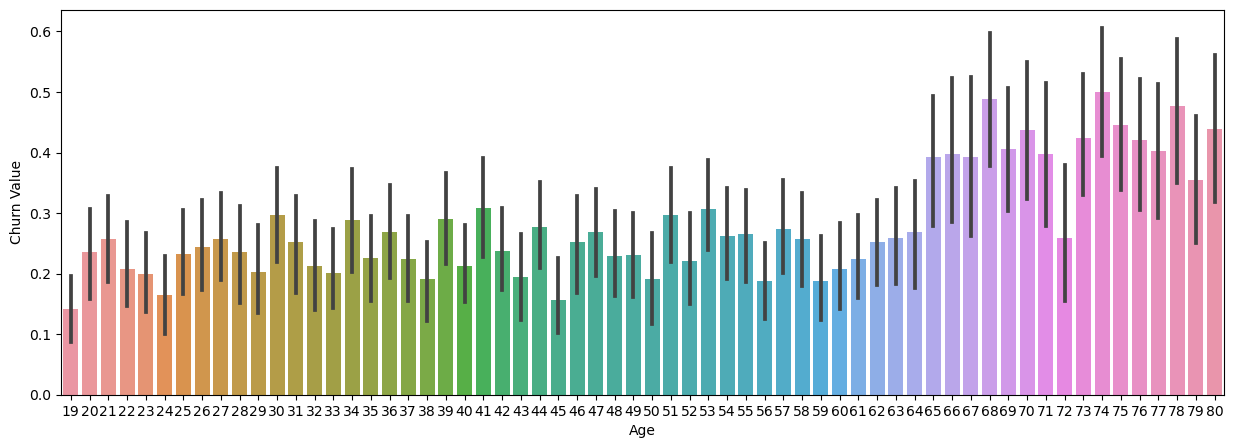

In [5]:
# Age
fig,(ax1)= plt.subplots(nrows=1)
fig.set_size_inches(15,5)
sns.barplot(data=df, x="Age", y="Churn Value", ax=ax1)

<AxesSubplot:xlabel='Number of Dependents', ylabel='Churn Value'>

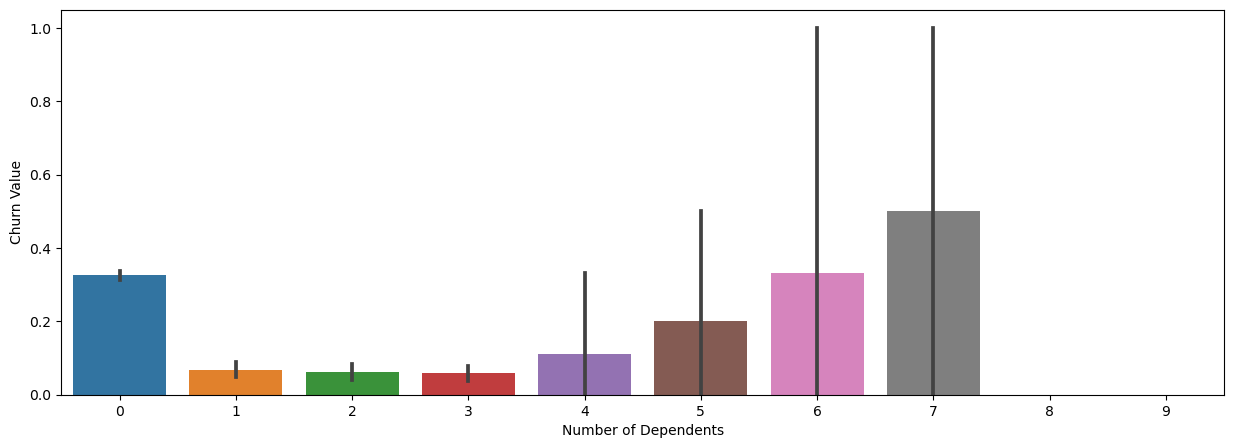

In [6]:
# Number of Dependents
fig,(ax1)= plt.subplots(nrows=1)
fig.set_size_inches(15,5)
sns.barplot(data=df, x="Number of Dependents", y="Churn Value", ax=ax1)

<AxesSubplot:xlabel='Tenure in Months', ylabel='Churn Value'>

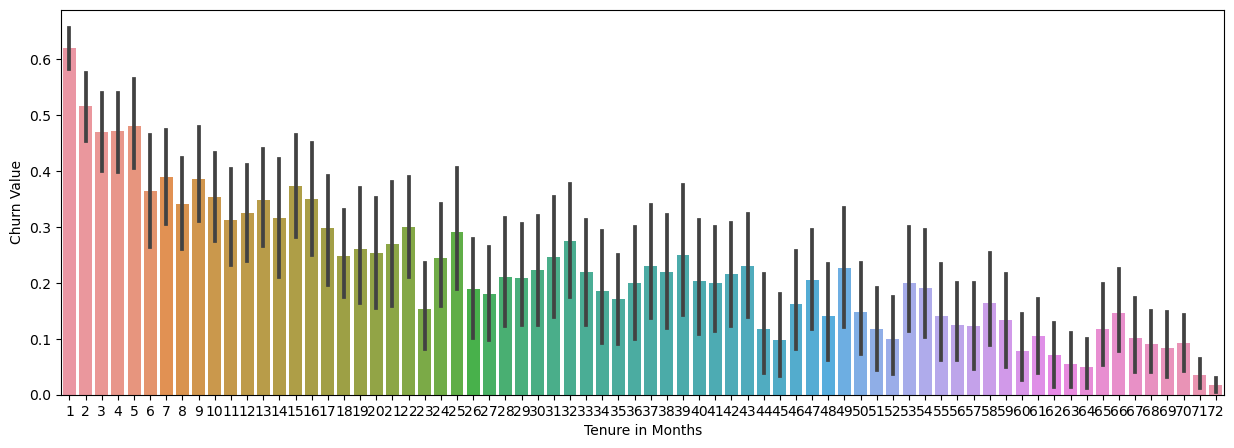

In [7]:
# Tenure in Months
fig,(ax1)= plt.subplots(nrows=1)
fig.set_size_inches(15,5)
sns.barplot(data=df, x="Tenure in Months", y="Churn Value", ax=ax1)

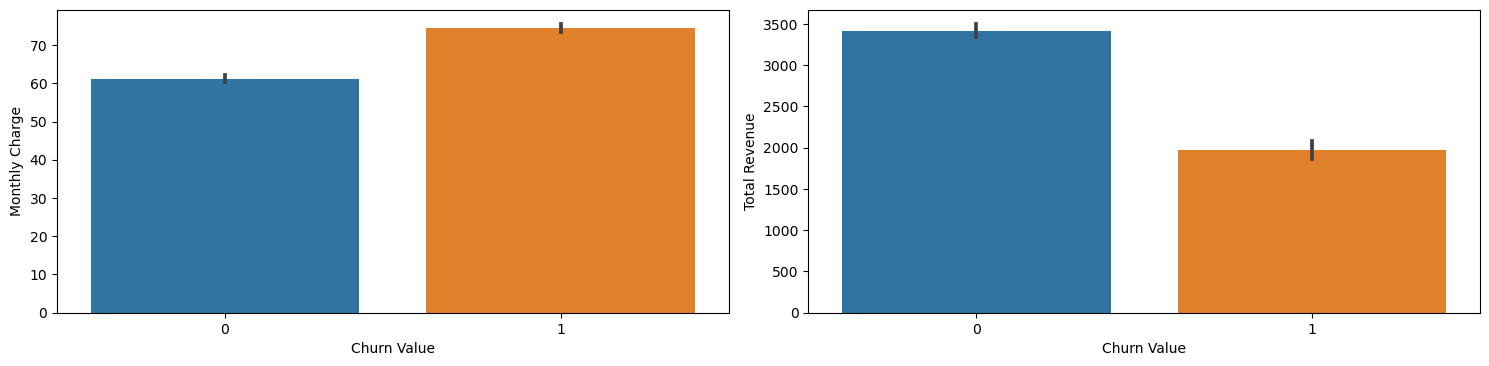

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# 수치형 컬럼들
cols = ['Monthly Charge','Total Revenue']

# 그래프의 크기 설정
plt.figure(figsize=(15, 25))

# 서브플롯 그리기
for i, col in enumerate(cols):
    plt.subplot(7, 2, i + 1)
    sns.barplot(data=df, x="Churn Value", y=col)
    plt.ylabel(col)
    plt.xlabel('Churn Value')

# 그래프 간의 간격 조정
plt.tight_layout()

# 그래프 표시
plt.show()

멘토링 피드백 : 수치형 변수들은 distplot이나 boxplot으로도 살펴보기

In [9]:
df_0 = df[df["Churn Value"] == 0]
df_1 = df[df["Churn Value"] == 1]
df_0.shape, df_1.shape

((5174, 13), (1869, 13))

<AxesSubplot:xlabel='Number of Dependents', ylabel='Density'>

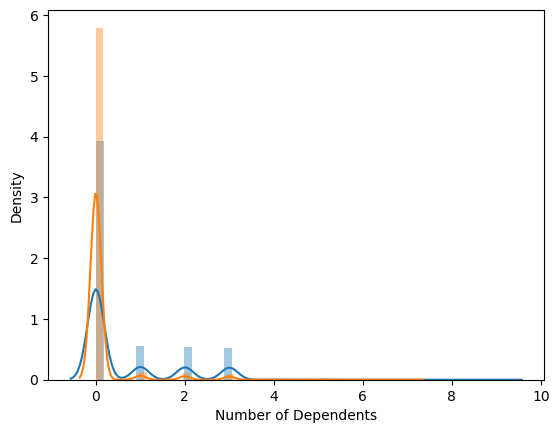

In [47]:
# Number of Dependents 따른 이탈 여부를 시각화

sns.distplot(df_0["Number of Dependents"])
sns.distplot(df_1["Number of Dependents"])

<AxesSubplot:xlabel='Monthly Charge', ylabel='Density'>

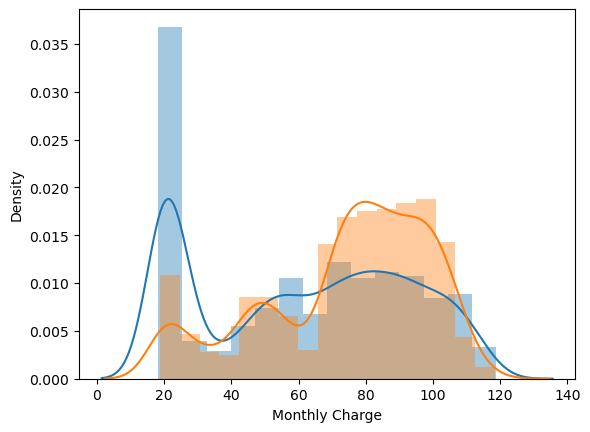

In [10]:
# Monthly Charge 따른 이탈 여부를 시각화

sns.distplot(df_0["Monthly Charge"])
sns.distplot(df_1["Monthly Charge"])


65에서부터 이탈율이 높아지는 것으로 보임

<AxesSubplot:xlabel='Total Revenue', ylabel='Density'>

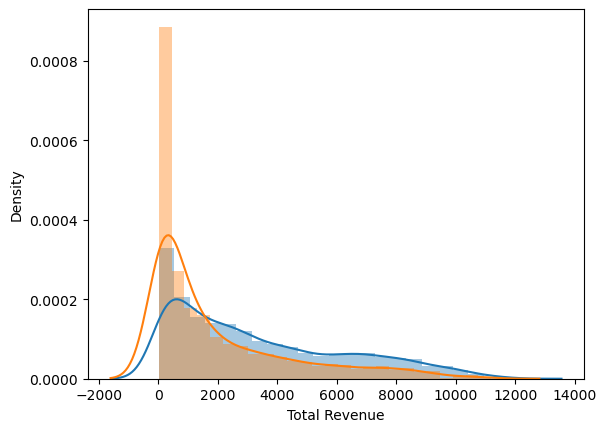

In [11]:
# Total Revenue 따른 이탈 여부를 시각화

sns.distplot(df_0["Total Revenue"])
sns.distplot(df_1["Total Revenue"])


2000부터 이탈율이 낮아지는 것으로 보임 => 장기고객일수록 Total Revenue가 커지기 때문

# 전처리

## Label Encoding

In [12]:
df['Membership'] = df['Membership'].map({'None': 0, 'Offer A': 1, 'Offer B': 2, 'Offer C': 3, 'Offer D': 4, 'Offer E': 5})
df['Contract'] = df['Contract'].map({'Month-to-Month': 1, 'One Year': 12, 'Two Year': 24}) 

df

,Age,Age Group,Number of Dependents,Membership,Satisfaction Score,Tech services,Streaming services,Combined Product,Contract,Tenure in Months,Monthly Charge,Total Revenue,Churn Value
0,78,70,0,0,3,1,1,2,1,1,39.65,59.65,1
1,74,70,1,5,3,1,0,4,1,8,80.65,1024.10,1
2,71,70,3,4,2,0,2,4,1,18,95.45,1910.88,1
3,78,70,1,3,2,2,2,4,1,25,98.50,2995.07,1
4,80,80,1,3,2,0,0,4,1,37,76.50,3102.36,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,30,30,0,0,5,0,0,1,24,72,21.15,3039.53,0
7039,38,30,2,3,3,3,2,2,12,24,84.80,2807.47,0
7040,30,30,2,0,4,2,2,4,12,72,103.20,9453.04,0
7041,32,30,2,0,4,1,0,2,1,11,29.60,319.21,0


## 정규화

In [13]:
from sklearn.preprocessing import MinMaxScaler

scaled_df = df.copy()

scaled_cols = df.columns[:-1]

# MinMaxScaler를 사용한 정규화
scaler = MinMaxScaler()
scaled_df[scaled_cols] = scaler.fit_transform(scaled_df[scaled_cols])
scaled_df

,Age,Age Group,Number of Dependents,Membership,Satisfaction Score,Tech services,Streaming services,Combined Product,Contract,Tenure in Months,Monthly Charge,Total Revenue,Churn Value
0,0.967213,0.857143,0.000000,0.0,0.50,0.25,0.5,0.333333,0.000000,0.000000,0.212935,0.003202,1
1,0.901639,0.857143,0.111111,1.0,0.50,0.25,0.0,1.000000,0.000000,0.098592,0.620896,0.083855,1
2,0.852459,0.857143,0.333333,0.8,0.25,0.00,1.0,1.000000,0.000000,0.239437,0.768159,0.158013,1
3,0.967213,0.857143,0.111111,0.6,0.25,0.50,1.0,1.000000,0.000000,0.338028,0.798507,0.248680,1
4,1.000000,1.000000,0.111111,0.6,0.25,0.00,0.0,1.000000,0.000000,0.507042,0.579602,0.257652,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.180328,0.285714,0.000000,0.0,1.00,0.00,0.0,0.000000,1.000000,1.000000,0.028856,0.252398,0
7039,0.311475,0.285714,0.222222,0.6,0.50,0.75,1.0,0.333333,0.478261,0.323944,0.662189,0.232992,0
7040,0.180328,0.285714,0.222222,0.0,0.75,0.50,1.0,1.000000,0.478261,1.000000,0.845274,0.788735,0
7041,0.213115,0.285714,0.222222,0.0,0.75,0.25,0.0,0.333333,0.000000,0.140845,0.112935,0.024908,0


## VIF계산 - 다중공선성 점검

In [14]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

num_cols = scaled_df.columns[:-1]

vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(
    scaled_df[num_cols].values, i) for i in range(scaled_df[num_cols].shape[1])]
vif['features'] = scaled_df[num_cols].columns
print(vif)

    VIF Factor              features
0   111.480876                   Age
1   132.289718             Age Group
2     1.295883  Number of Dependents
3     1.619575            Membership
4     3.961173    Satisfaction Score
5     4.645286         Tech services
6     6.426846    Streaming services
7    34.674028      Combined Product
8     3.542168              Contract
9    15.171091      Tenure in Months
10   74.905351        Monthly Charge
11   15.237402         Total Revenue


VIF가 100이 넘는 Age, Age Group 중 Age Group 제거

In [15]:
final_df = scaled_df.drop(['Age Group'],axis=1,inplace=False)

num_cols = final_df.columns[:-1]

vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(
    final_df[num_cols].values, i) for i in range(final_df[num_cols].shape[1])]
vif['features'] = final_df[num_cols].columns
print(vif)

    VIF Factor              features
0     3.356358                   Age
1     1.290386  Number of Dependents
2     1.581552            Membership
3     3.709452    Satisfaction Score
4     4.644206         Tech services
5     6.417872    Streaming services
6    34.674003      Combined Product
7     3.542166              Contract
8    14.770334      Tenure in Months
9    74.307429        Monthly Charge
10   14.871259         Total Revenue


# 학습/테스트셋 분리

In [16]:
from sklearn.model_selection import train_test_split

y_target = final_df['Churn Value']
X_data = final_df.drop(['Churn Value'],axis=1,inplace=False)

X_train , X_test , y_train , y_test = train_test_split(X_data , y_target ,test_size=0.2, random_state=156)


# 모델 학습

## RandomForest

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf_clf = RandomForestClassifier(random_state=42)

params = {
    'n_estimators':[100], # 결정 트리 개수 지정
    'max_depth' : [6, 8, 10, 12], # 트리의 최대 깊이 지정
    'min_samples_leaf' : [8, 12, 18 ], # 분할된 경우 왼쪽, 오른쪽의 브랜치 노드에서 가져가야 할 최소한의 샘플 데이터 수
    'min_samples_split' : [8, 16, 20] # 노드를 분할하기 위한 최소한의 샘플 데이터 수 => 과적합 제어
}
# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_grid_cv = GridSearchCV(rf_clf , param_grid=params , cv=2, n_jobs=-1 )
rf_grid_cv.fit(X_train , y_train)

print('최적 하이퍼 파라미터:\n', rf_grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(rf_grid_cv.best_score_))

최적 하이퍼 파라미터:
 {'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 20, 'n_estimators': 100}
최고 예측 정확도: 0.9535


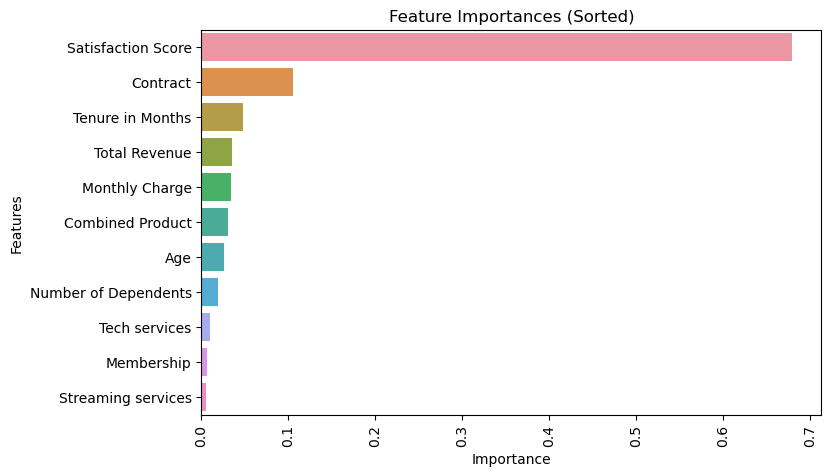

In [18]:
best_rf_model = rf_grid_cv.best_estimator_

best_rf_model.fit(X_train , y_train)
feature_names = final_df.columns[:-1]

# 학습된 모델을 사용하여 피처 중요도를 얻습니다.
feature_importances = best_rf_model.feature_importances_

# 피처 중요도를 기준으로 내림차순으로 정렬합니다.
sorted_idx = np.argsort(feature_importances)[::-1]
sorted_feature_names = [feature_names[i] for i in sorted_idx]
sorted_feature_importances = feature_importances[sorted_idx]

# 피처 중요도를 시각화합니다.
plt.figure(figsize=(8, 5))
sns.barplot(x=sorted_feature_importances, y=sorted_feature_names)
plt.title("Feature Importances (Sorted)")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.xticks(rotation=90)
plt.show()

## DecisionTree

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

dt_clf = DecisionTreeClassifier(random_state=42)

parameters = {'max_depth':[2, 3, 5, 10],
             'min_samples_split':[2, 3, 5],
             'min_samples_leaf':[1, 5, 8]}

# DecisionTreeClassifier 객체 생성 후 GridSearchCV 수행
dt_grid_cv = GridSearchCV(dt_clf , param_grid=parameters , cv=2, n_jobs=-1 )
dt_grid_cv.fit(X_train , y_train)

print('최적 하이퍼 파라미터:\n', dt_grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(dt_grid_cv.best_score_))

최적 하이퍼 파라미터:
 {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
최고 예측 정확도: 0.9499


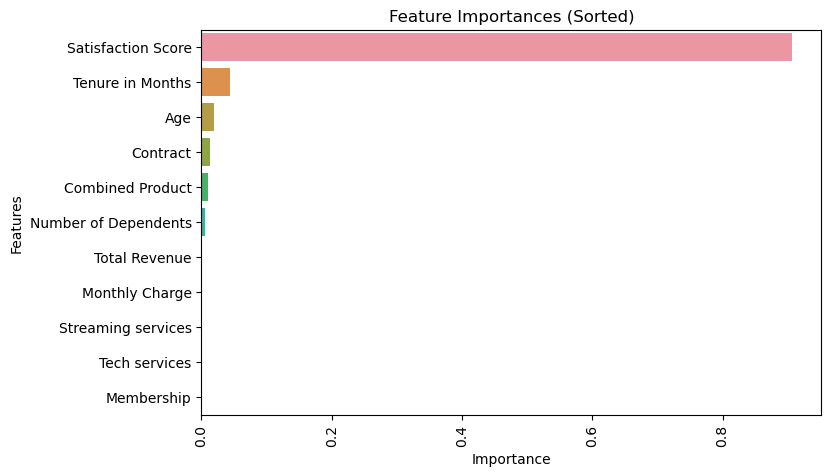

In [20]:
best_dt_model = dt_grid_cv.best_estimator_

best_dt_model.fit(X_train , y_train)
feature_names = final_df.columns[:-1]

# 학습된 모델을 사용하여 피처 중요도를 얻습니다.
feature_importances = best_dt_model.feature_importances_

# 피처 중요도를 기준으로 내림차순으로 정렬합니다.
sorted_idx = np.argsort(feature_importances)[::-1]
sorted_feature_names = [feature_names[i] for i in sorted_idx]
sorted_feature_importances = feature_importances[sorted_idx]

# 피처 중요도를 시각화합니다.
plt.figure(figsize=(8, 5))
sns.barplot(x=sorted_feature_importances, y=sorted_feature_names)
plt.title("Feature Importances (Sorted)")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.xticks(rotation=90)
plt.show()

## GradientBoosting

In [21]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

gb_clf = GradientBoostingClassifier(random_state=42)

# 랜덤 시드 설정
random_seed = 42
np.random.seed(random_seed)

params = {
    'n_estimators':[100], # 결정 트리 개수 지정
    'max_depth' : [6, 8, 10, 12], # 트리의 최대 깊이 지정
    'min_samples_leaf' : [8, 12, 18,20,24 ], # 분할된 경우 왼족, 오른쪽의 브랜치 노드에서 가져가야 할 최소한의 샘플 데이터 수
    'min_samples_split' : [8, 16, 20,22,26], # 노드를 분할하기 위한 최소한의 샘플 데이터 수 => 과적합 제어
     'learning_rate' :[random.uniform(0.01, 0.1) for _ in range(5)]    
}


gb_grid_cv = GridSearchCV(gb_clf , param_grid=params , cv=2, n_jobs=-1 )
gb_grid_cv.fit(X_train , y_train)

print('최적 하이퍼 파라미터:\n', gb_grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(gb_grid_cv.best_score_))

최적 하이퍼 파라미터:
 {'learning_rate': 0.029589898430502193, 'max_depth': 6, 'min_samples_leaf': 8, 'min_samples_split': 22, 'n_estimators': 100}
최고 예측 정확도: 0.9569


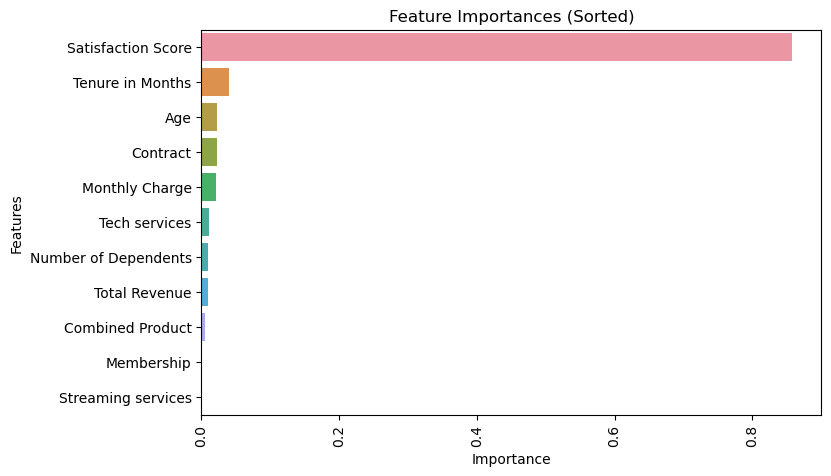

In [22]:
best_gb_model = gb_grid_cv.best_estimator_

best_gb_model.fit(X_train , y_train)
feature_names = final_df.columns[:-1]

# 학습된 모델을 사용하여 피처 중요도를 얻습니다.
feature_importances = best_gb_model.feature_importances_

# 피처 중요도를 기준으로 내림차순으로 정렬합니다.
sorted_idx = np.argsort(feature_importances)[::-1]
sorted_feature_names = [feature_names[i] for i in sorted_idx]
sorted_feature_importances = feature_importances[sorted_idx]

# 피처 중요도를 시각화합니다.
plt.figure(figsize=(8, 5))
sns.barplot(x=sorted_feature_importances, y=sorted_feature_names)
plt.title("Feature Importances (Sorted)")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.xticks(rotation=90)
plt.show()

## XGBoost

In [23]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
import random

XG_clf = XGBClassifier(random_state=101, objective='binary:logistic')

params = {'n_estimators':[100,200,300,400], 
           'learning_rate' :[0.1, 0.2, 0.3, 0.4],
          'min_child_weight' : [1,2,3,4,5],
          'max_depth' : [1,2,3,4,5]}

xg_grid_cv = GridSearchCV(XG_clf , param_grid=params , cv=2, n_jobs=-1 )
xg_grid_cv.fit(X_train , y_train)

print('최적 하이퍼 파라미터:\n', xg_grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(xg_grid_cv.best_score_))

최적 하이퍼 파라미터:
 {'learning_rate': 0.1, 'max_depth': 4, 'min_child_weight': 1, 'n_estimators': 100}
최고 예측 정확도: 0.9567


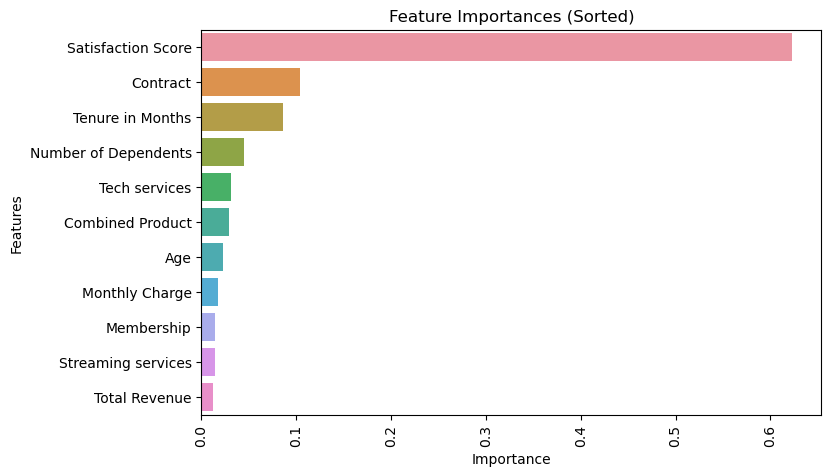

In [24]:
best_xg_model = xg_grid_cv.best_estimator_

best_xg_model.fit(X_train , y_train)
feature_names = final_df.columns[:-1]

# 학습된 모델을 사용하여 피처 중요도를 얻습니다.
feature_importances = best_xg_model.feature_importances_

# 피처 중요도를 기준으로 내림차순으로 정렬합니다.
sorted_idx = np.argsort(feature_importances)[::-1]
sorted_feature_names = [feature_names[i] for i in sorted_idx]
sorted_feature_importances = feature_importances[sorted_idx]

# 피처 중요도를 시각화합니다.
plt.figure(figsize=(8, 5))
sns.barplot(x=sorted_feature_importances, y=sorted_feature_names)
plt.title("Feature Importances (Sorted)")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.xticks(rotation=90)
plt.show()

## LightGBM

In [25]:
import lightgbm as lgb

lgb_clf = lgb.LGBMClassifier(random_state=101, objective='binary')

params = {'num_leaves' : [8, 12, 18,20,24 ], 'min_data_in_leaf' : [8, 12, 18,20,24 ], 'max_depth' : [2, 3, 5, 10] }

lgb_grid_cv = GridSearchCV(lgb_clf , param_grid=params , cv=2, n_jobs=-1 )
lgb_grid_cv.fit(X_train , y_train)

print('최적 하이퍼 파라미터:\n', lgb_grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(lgb_grid_cv.best_score_))

[LightGBM] [Warning] min_data_in_leaf is set=24, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=24
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=24, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=24
[LightGBM] [Info] Number of positive: 1503, number of negative: 4131
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000237 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 678
[LightGBM] [Info] Number of data points in the train set: 5634, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.266773 -> initscore=-1.011056
[LightGBM] [Info] Start training from score -1.011056
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with pos

[LightGBM] [Warning] min_data_in_leaf is set=24, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=24
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=24, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=24
[LightGBM] [Info] Number of positive: 1503, number of negative: 4131
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001018 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 678
[LightGBM] [Info] Number of data points in the train set: 5634, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.266773 -> initscore=-1.011056
[LightGBM] [Info] Start training from score -1.011056
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spli

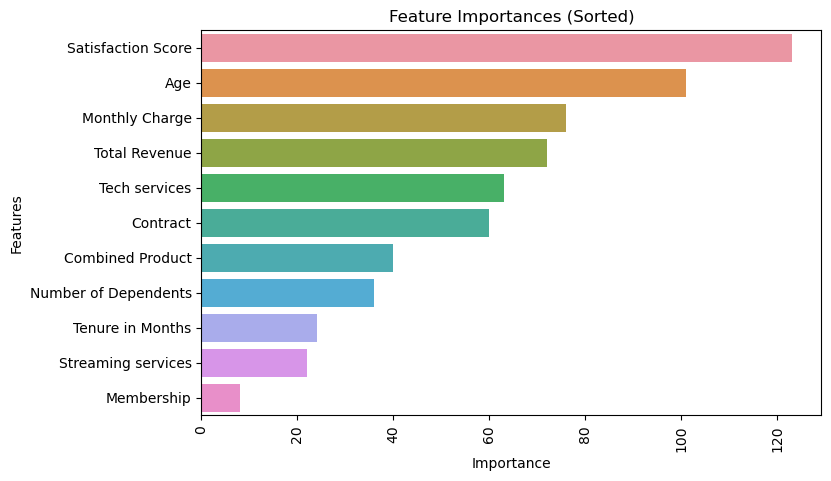

In [26]:
best_lgb_model = lgb_grid_cv.best_estimator_

best_lgb_model.fit(X_train , y_train)
feature_names = final_df.columns[:-1]

# 학습된 모델을 사용하여 피처 중요도를 얻습니다.
feature_importances = best_lgb_model.feature_importances_

# 피처 중요도를 기준으로 내림차순으로 정렬합니다.
sorted_idx = np.argsort(feature_importances)[::-1]
sorted_feature_names = [feature_names[i] for i in sorted_idx]
sorted_feature_importances = feature_importances[sorted_idx]

# 피처 중요도를 시각화합니다.
plt.figure(figsize=(8, 5))
sns.barplot(x=sorted_feature_importances, y=sorted_feature_names)
plt.title("Feature Importances (Sorted)")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.xticks(rotation=90)
plt.show()

## CatBoost

In [28]:
from catboost import CatBoostClassifier, Pool

cb_clf = CatBoostClassifier(iterations=2,
                           depth=2,
                           learning_rate=1,
                           loss_function='Logloss',
                           verbose=True)
# train the model
cb_clf.fit(X_train, y_train)

# 모델을 사용하여 테스트 데이터에 대한 예측 수행
y_pred = cb_clf.predict(X_test)

# 정확도 평가
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

print('모델의 정확도:', accuracy)

0:	learn: 0.2673897	total: 167ms	remaining: 167ms
1:	learn: 0.1831603	total: 168ms	remaining: 0us
모델의 정확도: 0.9453513129879347


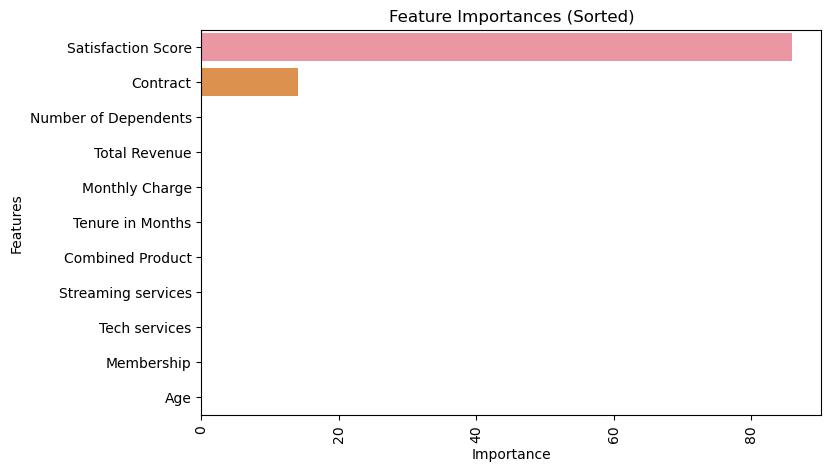

In [29]:
import matplotlib.pyplot as plt

# 모델의 피처 중요도 가져오기
feature_importance = cb_clf.get_feature_importance(type='FeatureImportance')

# 피처 이름 가져오기 (예시: X_train의 열 이름)
feature_names = final_df.columns[:-1]

# 피처 중요도를 기준으로 내림차순으로 정렬합니다.
sorted_idx = np.argsort(feature_importance)[::-1]
sorted_feature_names = [feature_names[i] for i in sorted_idx]
sorted_feature_importances = feature_importance[sorted_idx]

# 피처 중요도를 시각화합니다.
plt.figure(figsize=(8, 5))
sns.barplot(x=sorted_feature_importances, y=sorted_feature_names)
plt.title("Feature Importances (Sorted)")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.xticks(rotation=90)
plt.show()


# 모델 선택

* RandomForest : 0.9535
* DecisionTree : 0.9499
* GradientBoosting : 0.9560
* XGBoost : 0.9567
* **LightGBM : 0.9567** (XGBoost보다 피처 중요도가 좀 더 고르게 나옴)
* CatBoost : 0.9453

# 모델 적용

LightGBM 모델 가져오기

In [66]:
import lightgbm as lgb

lgb_clf = lgb.LGBMClassifier(random_state=101, objective='binary')

params = {'num_leaves' : [8, 12, 18,20,24 ], 'min_data_in_leaf' : [8, 12, 18,20,24 ], 'max_depth' : [2, 3, 5, 10] }

lgb_grid_cv = GridSearchCV(lgb_clf , param_grid=params , cv=2, n_jobs=-1 )
lgb_grid_cv.fit(X_train , y_train)

best_lgb_model = lgb_grid_cv.best_estimator_
best_lgb_model.fit(X_train , y_train)

[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Info] Number of positive: 1503, number of negative: 4131
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002089 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 5634, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.266773 -> initscore=-1.011056
[LightGBM] [Info] Start training from score -1.011056
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spli

LGBMClassifier(max_depth=3, min_data_in_leaf=20, num_leaves=8,
               objective='binary', random_state=101)

가상 고객 데이터(정규화 과정 거쳤다고 가정) 적용

In [67]:
# 최적의 모델을 사용하여 테스트 데이터를 예측합니다.

# Satisfaction Score 테스트 - 어떤 데이터 값을 넣어도 99, 9, 0점의 결과만 나오는지?
# 만족도 점수 1,2,3,4,5 => 정규화 0.0, 0.25, 0.5, 0.75, 1.0
test_data = [[0.413115, 0.111111, 0.6, 0.75, 0.25, 1.0, 0.333333,  0.478261, 0.098592, 0.620896, 0.083855], 
            [0.901639, 0.000000, 1.0, 0.75, 0.50, 0.5, 1.000000, 0.000000, 1.000000, 0.028856, 0.252398], 
            [0.852459, 0.333333, 0.6, 0.75, 0.25, 1.0, 1.000000, 0.478261, 0.507042, 0.579602, 0.257652], 
            [0.180328, 0.111111, 0.8, 0.75, 0.00, 0.0, 0.333333, 1.000000, 0.338028, 0.798507, 0.248680], 
            [0.213115, 0.222222,  0.0, 0.75, 0.25, 0.5, 0.333333, 1.000000, 0.239437, 0.768159, 0.158013]] 
predicted_class = best_lgb_model.predict(test_data)

# 최적의 모델을 사용하여 테스트 데이터의 클래스 확률을 예측합니다.
predicted_proba = best_lgb_model.predict_proba(test_data)

# 각 테스트 데이터에 대한 클래스 1일 확률을 출력합니다.
for i, data in enumerate(test_data, start=1):
    predicted_proba = best_lgb_model.predict_proba([data])
    probability_of_class_1 = predicted_proba[0][1]
    print(f"테스트 데이터 {i}의 가상 고객이 이탈할 확률:", probability_of_class_1)
    print(f"테스트 데이터 {i}의 가상 고객 이탈 점수:", int(probability_of_class_1 * 100), "점")


ValueError: Number of features of the model must match the input. Model n_features_ is 10 and input n_features is 11

In [31]:
final_df

,Age,Number of Dependents,Membership,Satisfaction Score,Tech services,Streaming services,Combined Product,Contract,Tenure in Months,Monthly Charge,Total Revenue,Churn Value
0,0.967213,0.000000,0.0,0.50,0.25,0.5,0.333333,0.000000,0.000000,0.212935,0.003202,1
1,0.901639,0.111111,1.0,0.50,0.25,0.0,1.000000,0.000000,0.098592,0.620896,0.083855,1
2,0.852459,0.333333,0.8,0.25,0.00,1.0,1.000000,0.000000,0.239437,0.768159,0.158013,1
3,0.967213,0.111111,0.6,0.25,0.50,1.0,1.000000,0.000000,0.338028,0.798507,0.248680,1
4,1.000000,0.111111,0.6,0.25,0.00,0.0,1.000000,0.000000,0.507042,0.579602,0.257652,1
...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.180328,0.000000,0.0,1.00,0.00,0.0,0.000000,1.000000,1.000000,0.028856,0.252398,0
7039,0.311475,0.222222,0.6,0.50,0.75,1.0,0.333333,0.478261,0.323944,0.662189,0.232992,0
7040,0.180328,0.222222,0.0,0.75,0.50,1.0,1.000000,0.478261,1.000000,0.845274,0.788735,0
7041,0.213115,0.222222,0.0,0.75,0.25,0.0,0.333333,0.000000,0.140845,0.112935,0.024908,0


Satisfaction Score 결과에 의해 이탈 점수가 99, 9, 0 세가지로만 나옴

## Satisfaction Score 제외

LightGBM에 적용한 결과, Satisfaction Score가 결과에 너무 큰 영향을 미침 </br>
Satisfaction Score 제외하고 재학습/예측

In [54]:
from sklearn.model_selection import train_test_split

y_target = final_df['Churn Value']
X_data = final_df.drop(['Churn Value', 'Satisfaction Score'],axis=1,inplace=False)

X_train , X_test , y_train , y_test = train_test_split(X_data , y_target ,test_size=0.2, random_state=156)


In [55]:
import lightgbm as lgb

lgb_clf = lgb.LGBMClassifier(random_state=101, objective='binary')

params = {'num_leaves' : [8, 12, 18,20,24 ], 'min_data_in_leaf' : [8, 12, 18,20,24 ], 'max_depth' : [2, 3, 5, 10] }

lgb_grid_cv = GridSearchCV(lgb_clf , param_grid=params , cv=2, n_jobs=-1 )
lgb_grid_cv.fit(X_train , y_train)

best_lgb_model = lgb_grid_cv.best_estimator_
best_lgb_model.fit(X_train , y_train)

[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Info] Number of positive: 1503, number of negative: 4131
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001002 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 5634, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.266773 -> initscore=-1.011056
[LightGBM] [Info] Start training from score -1.011056
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spli

LGBMClassifier(max_depth=3, min_data_in_leaf=20, num_leaves=8,
               objective='binary', random_state=101)

In [63]:
# 최적의 모델을 사용하여 테스트 데이터를 예측합니다.
test_data = [[0.413115, 0.111111, 0.6, 0.25, 1.0, 0.333333,  0.478261, 0.098592, 0.620896, 0.083855], 
            [0.901639, 0.222222, 1.0,  0.50, 0.5, 1.000000, 0.000000, 1.000000, 0.028856, 0.252398], 
            [0.852459, 0.333333, 0.6,  0.25, 1.0, 1.000000, 0.478261, 0.507042, 0.579602, 0.257652], 
            [0.180328, 0.111111, 0.8, 0.00, 0.0, 0.333333, 1.000000, 0.338028, 0.798507, 0.248680], 
            [0.180328, 0.222222,  0.0, 0.25, 0.5, 0.333333, 1.000000, 0.239437, 0.768159, 0.158013]] 

predicted_class = best_lgb_model.predict(test_data)

# 최적의 모델을 사용하여 테스트 데이터의 클래스 확률을 예측합니다.
predicted_proba = best_lgb_model.predict_proba(test_data)

# 각 테스트 데이터에 대한 클래스 1일 확률을 출력합니다.
for i, data in enumerate(test_data, start=1):
    predicted_proba = best_lgb_model.predict_proba([data])
    probability_of_class_1 = predicted_proba[0][1]
    print(f"테스트 데이터 {i}의 가상 고객이 이탈할 확률:", probability_of_class_1)
    print(f"테스트 데이터 {i}의 가상 고객 이탈 점수:", int(probability_of_class_1 * 100), "점")


[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
테스트 데이터 1의 가상 고객이 이탈할 확률: 0.03113524749505273
테스트 데이터 1의 가상 고객 이탈 점수: 3 점
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
테스트 데이터 2의 가상 고객이 이탈할 확률: 0.04107731955531779
테스트 데이터 2의 가상 고객 이탈 점수: 4 점
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
테스트 데이터 3의 가상 고객이 이탈할 확률: 0.014647939205086254
테스트 데이터 3의 가상 고객 이탈 점수: 1 점
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
테스트 데이터 4의 가상 고객이 이탈할 확률: 0.03077045426448449